# Improving the model

### Introduction

In the previous lesson we saw that we can evaluate how well a model matches the data.  We wanted to describe the performance of the model as a whole, so we first tried adding up each of the errors to calculate the total error. 

However, because positive and negative errors cancel each other out, we fixed this by first squaring each of the errors and then calculating the *residual sum of squares* (RSS).

Let's take a look at this with our ad spending and t-shirts example.  The left two columns have the actual data we collected: the amount of ad spending and the monthly t-shirt sales. The right two columns have the predictions, and squared error for the regression model:

$$tshirt\_sales = .6*ad\_spend + 100$$

|ad spending    |t-shirts| predicted t-shirts |  squared error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 580  | 62500|
|    1500       | 780 | 1000| 48400|
|    2000      | 1130 | 1300| 28900|
|    3500      | 1310 | 2200| 792100|
|    4000      | 1780 | 2500| 518400|

With the residual sum of squares, we take each of our data point in our observed data, and find the difference between what our model predicts at that point.  Then we square the errors  -- to make each of error positive -- and add up these squared errors, to get the residual sum of squares.

What's makes this useful is that now we can can now use our squared error metric to different models.  For example, above is the RSS for the model $tshirt\_sales = .6*ad\_spend + 100$ and we could compare this with the squared error for a different model:

$$tshirt\_sales = .4*ad\_spend + 100$$

|ad spending    |t-shirts| predicted t-shirts | squared error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 420  | 8100|
|    1500       | 780 | 700| 6400|
|    2000      | 1130 | 900| 52900|
|    3500      | 1310 | 1500| 36100|
|    4000      | 1780 | 1700| 6400|

Which gives an RSS of $109900$.

## Finding the best fit line

Now above, we saw we see which model better predicts the T-shirt sales by calculating the RSS when our value of $m = .4$ and when $m = .6$ and then comparing.  

But really, what we would like to do is to find the *best* line.  How should we do that?  Should we just trying a bunch of different values for $m$ and then calculate the value of RSS for each one?  Well, kinda, yea.  Then we'll do a similar procedure for our y intercept, b.

Let's start by trying two different values for $m$ -- $.6$, $.7$, and then $.8$.

In [2]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side
from graph import trace_values


m_values = [.5, .6]
b = 100
rss_traces = []
model_traces = []
ad_spends = [800, 1500, 2000, 3500, 4000]
tshirt_sales = [330, 780, 1130, 1310, 1780]

actual_trace = trace_values(x_values = ad_spends, y_values = tshirt_sales)

for m in m_values:
    rss_trace = trace_rss(m, b, ad_spends, tshirt_sales)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, ad_spends, tshirt_sales)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
figure = plot_side_by_side([actual_trace] + model_traces, rss_traces)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [3]:
import plotly.plotly as py
py.plot(figure)

'https://plot.ly/~JeffKatzy/186'

Let's walk through the above graph.  

* The model $ tshirt\_sales=.5∗ad\_spend + 100$ is the red line and the related RSS (another name for SSE) is over to the right in red of 428.7 thousand.  
* The model  $ tshirt\_sales=.6∗ad\_spend + 100$ is the yellow line and it's related RSS is in yellow with an RSS of 1.4503.

So we just tried models of  $ tshirt\_sales=.5∗ad\_spend + 100$ and $ tshirt\_sales=.6∗ad\_spend + 100$. 

Now let's try three more.
* $ tshirt\_sales=.2∗ad\_spend + 100$ 
* $ tshirt\_sales=.3∗ad\_spend + 100$ 
* $ tshirt\_sales=.4∗ad\_spend + 100$

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



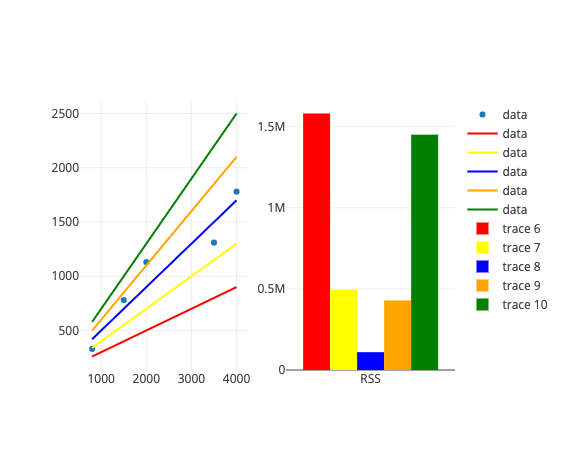

In [11]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side
from graph import trace_values


m_values = [.2, .3, .4, .5, .6]
rss_traces = []
model_traces = []

actual_trace = trace_values(x_values = ad_spends, y_values = tshirt_sales)

for m in m_values:
    rss_trace = trace_rss(m, b, ad_spends, tshirt_sales)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, ad_spends, tshirt_sales)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
plot_side_by_side([actual_trace] + model_traces, rss_traces)

So now the red, yellow, and blue, orange and green colors are associated with m values of .2, .3, .4, and .5, .6.  Do you really think that trying m values of .1 or .7 will give us a closer RSS?  Probably not.

## The point of it all

In looking at the chart to the right of our RSS values, we can begin to see a pattern.  In calculating the RSS with five sequential values of $m$, we see that our RSS plot curves downward towards a lowpoint in the middle.  So in trying to find the model that produces the lowest RSS, we do not have to try every single number.  Instead we can try different numbers and if our RSS decreases like it does when we move from $ tshirt\_sales=.3∗ad\_spend + 100$ to $ tshirt\_sales=.4∗ad\_spend + 100$ we keep increasing our value of $m$.  

And if the RSS instead *increases* like it does from $ tshirt\_sales=.5∗ad\_spend + 100$ to $tshirt\_sales=.6∗ad\_spend + 100$ we decrease our number.

This process of optimizing our model based on how its score against an error metric (here RSS) is called *fitting* our model to the data.  This is how the machine *learns* what parameters of the model to choose. 

### Summary

In this lesson, we saw how machine learning models can improve to find an optimal model.  One mechanisms for machine learning problems to do this is by trying different parameters and using the cost function to collect feedback on the model's performance.  A machine learning algorithm's loss function can give us feedback on our hypothesis functionso that it can improve step by step, as we saw above.  This process of changing the parameters so to find a machine learning model that minimizes a cost function is called training the model. 